## 2. Consider a 2D problem with 3 classes where each class is described by the following priors, mean vectors, and covariance matrices.

                                            P(C1) = 0.2
                                            μ1 =[3 2]𝑇
                                            ∑1=[1 −1] 
                                               [−1 2]

                                            P(C2) = 0.3
                                            μ2 =[5 4]𝑇
                                            ∑2=[1 −1] 
                                                [−1 7]

                                            P(C3) = 0.5
                                            μ3 =[2 5]𝑇
                                            ∑3=[0.5 0.5] 
                                                [0.5 3]

a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import patches

# Given Info for class A
p_1 = 0.2
mean_1 = np.array([3, 2])
cov_1=[[1,-1],[-1,2]]

# Given Info for class B
p_2 = 0.3
mean_2 = [5, 4]
cov_2=[[1,-1],[-1,7]]

# Given Info for class C
p_3 = 0.5
mean_3 = [2, 5]
cov_3=[[0.5,0.5],[0.5,3]]

# Calcualating eigen values and eigen vectors for all classes
w_1,v_1=np.linalg.eig(cov_1)
w_2,v_2=np.linalg.eig(cov_2)
w_3,v_3=np.linalg.eig(cov_3)

# Calcualating STD for all classes
std_1=np.sqrt(w_1)
std_2=np.sqrt(w_2)
std_3=np.sqrt(w_3)

# Generation gaussion data for all three classes
data_1 = np.random.multivariate_normal(mean_1, cov_1, int(p_1*3000))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(p_2*3000))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(p_3*3000))

# Equation of Likelyhood or P(x|Ck)
def get_likelyhood(point, mean, cov):
    S = np.array(cov)  # covarience
    m = np.array(mean) # mean
    x = np.array(point) # x,y(2d) in inidividual point on X,Y
    
    num = np.exp(-0.5*(np.matmul(np.matmul(np.array(x-m),np.array(np.linalg.inv(S))),np.array(x-m))))
    deno = ((2*np.pi)*np.power(np.linalg.det(S),1/2))
    return num / deno

Populating the interactive namespace from numpy and matplotlib


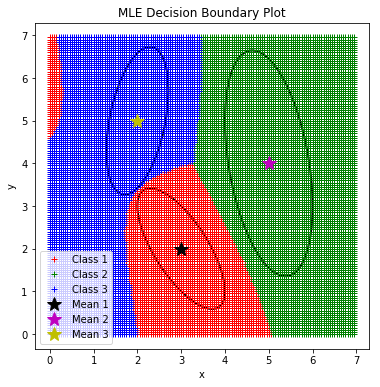

In [9]:
mle_points_c1 = []
mle_points_c2 = []
mle_points_c3 = []

# Generating Meshgrid
X,Y = np.mgrid[0:7:.05, 0:7:.05]
points=np.array([X.flatten(),Y.flatten()]).T


for point in points:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
      
    # MLE Logic
    if p_x_c1 > p_x_c2 and p_x_c1 > p_x_c3:  mle_points_c1.append(point.tolist()) # Classified as 1
    elif p_x_c2 > p_x_c1 and p_x_c2 > p_x_c3:  mle_points_c2.append(point.tolist())# Classified as 2
    else: mle_points_c3.append(point.tolist())# Classified as 3
        
fig, ax = plt.subplots(figsize=(6,6))

# Contour for class 1
angle1=np.degrees(np.arctan((v_1[0,1])/(v_1[1,1])))*(-1)
e1 = patches.Ellipse((mean_1), std_1[0]*2, std_1[1]*2,angle=angle1, linewidth=2, fill=False, zorder=1)
ax.add_patch(e1)        

# Contour for class 2
angle2=np.degrees(np.arctan((v_2[0,1])/(v_2[1,1])))*(-1)
e2 = patches.Ellipse((mean_2), std_2[0]*2, std_2[1]*2,angle=angle2, linewidth=2, fill=False, zorder=1)
ax.add_patch(e2)        

# Contour for class 3
angle3=np.degrees(np.arctan((v_3[0,1])/(v_3[1,1])))*(-1)
e3 = patches.Ellipse((mean_3), std_3[0]*2, std_3[1]*2,angle=angle3, linewidth=2, fill=False, zorder=1)
ax.add_patch(e3)   


plt.title('MLE Decision Boundary Plot')
# Plotting MLE graph points for class 1
plt.plot(np.array(mle_points_c1)[:,0],np.array(mle_points_c1)[:,1],'r+',label='Class 1')
# Plotting MLE graph points for class 2
plt.plot(np.array(mle_points_c2)[:,0],np.array(mle_points_c2)[:,1],'g+',label='Class 2')
# Plotting MLE graph points for class 3
plt.plot(np.array(mle_points_c3)[:,0],np.array(mle_points_c3)[:,1],'b+',label='Class 3')
# Plotting Mean for class 1
plt.plot(mean_1[0],mean_1[1],'k*',label='Mean 1', markersize=15)
# Plotting Mean for class 2
plt.plot(mean_2[0],mean_2[1],'m*',label='Mean 2', markersize=15)
# Plotting Mean for class 3
plt.plot(mean_3[0],mean_3[1],'y*',label='Mean 3', markersize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

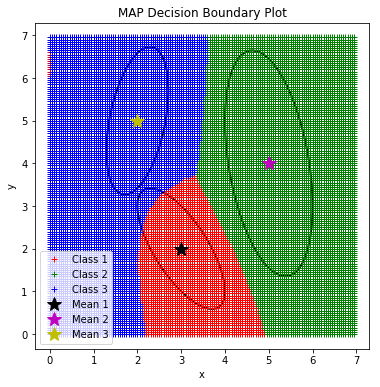

In [8]:
map_points_c1 = []
map_points_c2 = []
map_points_c3 = []

# Generating Meshgrid
X,Y = np.mgrid[0:7:.05, 0:7:.05]
points=np.array([X.flatten(),Y.flatten()]).T


for point in points:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
        
    # MAP Logic
    if p_x_c1*p_1 > p_x_c2*p_2 and p_x_c1*p_1 > p_x_c3*p_3:  map_points_c1.append(point.tolist()) # Classified as 1
    elif p_x_c2*p_2 > p_x_c1*p_1 and p_x_c2*p_2 > p_x_c3*p_3:  map_points_c2.append(point.tolist()) # Classified as 2
    else: map_points_c3.append(point.tolist()) # Classified as 3

        
fig, ax = plt.subplots(figsize=(6,6))

# Contour for class 1
angle1=np.degrees(np.arctan((v_1[0,1])/(v_1[1,1])))*(-1)
e1 = patches.Ellipse((mean_1), std_1[0]*2, std_1[1]*2,angle=angle1, linewidth=2, fill=False, zorder=1)
ax.add_patch(e1)        

# Contour for class 2
angle2=np.degrees(np.arctan((v_2[0,1])/(v_2[1,1])))*(-1)
e2 = patches.Ellipse((mean_2), std_2[0]*2, std_2[1]*2,angle=angle2, linewidth=2, fill=False, zorder=1)
ax.add_patch(e2)        

# Contour for class 3
angle3=np.degrees(np.arctan((v_3[0,1])/(v_3[1,1])))*(-1)
e3 = patches.Ellipse((mean_3), std_3[0]*2, std_3[1]*2,angle=angle3, linewidth=2, fill=False, zorder=1)
ax.add_patch(e3)        
        
plt.title('MAP Decision Boundary Plot')
# Plotting MLE graph points for class 1
plt.plot(np.array(map_points_c1)[:,0],np.array(map_points_c1)[:,1],'r+',label='Class 1')
# Plotting MLE graph points for class 2
plt.plot(np.array(map_points_c2)[:,0],np.array(map_points_c2)[:,1],'g+',label='Class 2')
# Plotting MLE graph points for class 3
plt.plot(np.array(map_points_c3)[:,0],np.array(map_points_c3)[:,1],'b+',label='Class 3')
# Plotting Mean for class 1
plt.plot(mean_1[0],mean_1[1],'k*',label='Mean 1', markersize=15)
# Plotting Mean for class 2
plt.plot(mean_2[0],mean_2[1],'m*',label='Mean 2', markersize=15)
# Plotting Mean for class 3
plt.plot(mean_3[0],mean_3[1],'y*',label='Mean 3', markersize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

b. Generate a 3000 sample dataset using the prior probabilities of each class. For both the ML and MAP classifiers: classify the generated dataset, calculate a confusion matrix, and calculate the experimental P(ε). Discuss the results.

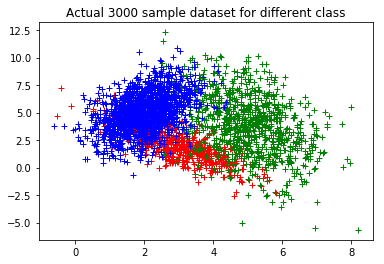

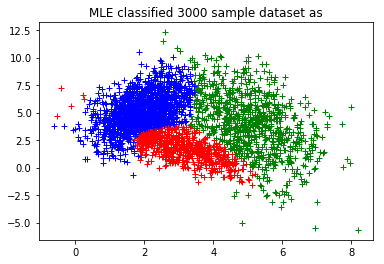

Confusion Matrix
[ 490 - 24 - 86 ]
[ 70 - 800 - 30 ]
[ 125 - 38 - 1337 ]
Probability of Error, p(e): 0.1243333333333333


In [4]:
# Plotting generated data
plt.title('Actual 3000 sample dataset for different class')
plt.plot(data_1[:,0],data_1[:,1],'r+')
plt.plot(data_2[:,0],data_2[:,1],'g+')
plt.plot(data_3[:,0],data_3[:,1],'b+')
plt.show()


mle_points_c1 = []
mle_points_c2 = []
mle_points_c3 = []


# Variables for confusion matrix
one_is_one = 0
one_is_two = 0
one_is_three = 0

# Variables for confusion matrix
two_is_one = 0
two_is_two = 0
two_is_three = 0

# Variables for confusion matrix
three_is_one = 0
three_is_two = 0
three_is_three = 0


# Classifing points Using MLE
for point in data_1:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    # MLE Logic
    if p_x_c1 > p_x_c2 and p_x_c1 > p_x_c3:  
        # Classified as 1
        mle_points_c1.append(point.tolist())
        one_is_one+=1
    elif p_x_c2 > p_x_c1 and p_x_c2 > p_x_c3: 
        # Classified as 2
        mle_points_c2.append(point.tolist())
        one_is_two+=1
    else: 
        # Classified as 3
        mle_points_c3.append(point.tolist())
        one_is_three+=1

# Classifing points Using MLE
for point in data_2:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    # MLE Logic
    if p_x_c1 > p_x_c2 and p_x_c1 > p_x_c3:  
        # Classified as 1
        mle_points_c1.append(point.tolist())
        two_is_one+=1
    elif p_x_c2 > p_x_c1 and p_x_c2 > p_x_c3:  
        # Classified as 2
        mle_points_c2.append(point.tolist())
        two_is_two+=1
    else: 
        # Classified as 3
        mle_points_c3.append(point.tolist())
        two_is_three+=1
     
# Classifing points Using MLE
for point in data_3:
    # MLE Logic
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    if p_x_c1 > p_x_c2 and p_x_c1 > p_x_c3:  
        # Classified as 1
        mle_points_c1.append(point.tolist())
        three_is_one+=1
    elif p_x_c2 > p_x_c1 and p_x_c2 > p_x_c3:  
        # Classified as 2
        mle_points_c2.append(point.tolist())
        three_is_two+=1
    else: 
        # Classified as 3
        mle_points_c3.append(point.tolist())
        three_is_three+=1

# Plotting points for all classes
plt.title('MLE classified 3000 sample dataset as')
plt.plot(np.array(mle_points_c1)[:,0],np.array(mle_points_c1)[:,1],'r+')
plt.plot(np.array(mle_points_c2)[:,0],np.array(mle_points_c2)[:,1],'g+')
plt.plot(np.array(mle_points_c3)[:,0],np.array(mle_points_c3)[:,1],'b+')
plt.show()

print('Confusion Matrix')
print('[',one_is_one,'-',one_is_two,'-',one_is_three,']')
print('[',two_is_one,'-',two_is_two,'-',two_is_three,']')
print('[',three_is_one,'-',three_is_two,'-',three_is_three,']')

probability_of_error = 1 - ((one_is_one+two_is_two+three_is_three) / 3000)
print('Probability of Error, p(e):',probability_of_error)

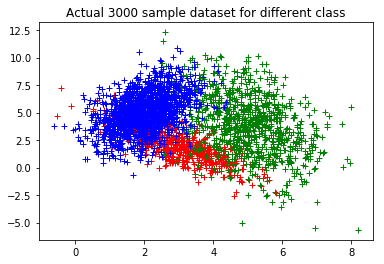

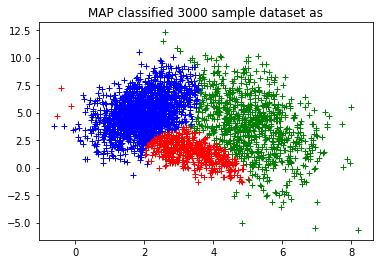

Confusion Matrix
[ 419 - 32 - 149 ]
[ 58 - 799 - 43 ]
[ 45 - 26 - 1429 ]
Probability of Error, p(e): 0.1176666666666667


In [31]:
# Plotting generated data
plt.title('Actual 3000 sample dataset for different class')
plt.plot(data_1[:,0],data_1[:,1],'r+')
plt.plot(data_2[:,0],data_2[:,1],'g+')
plt.plot(data_3[:,0],data_3[:,1],'b+')
plt.show()


# Variables for confusion matrix
one_is_one = 0
one_is_two = 0
one_is_three = 0

# Variables for confusion matrix
two_is_one = 0
two_is_two = 0
two_is_three = 0

# Variables for confusion matrix
three_is_one = 0
three_is_two = 0
three_is_three = 0

map_points_c1 = []
map_points_c2 = []
map_points_c3 = []


# Classifing points Using MAP
for point in data_1:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    if p_x_c1*p_1 > p_x_c2*p_2 and p_x_c1*p_1 > p_x_c3*p_3:  
        # Classified as 1
        map_points_c1.append(point.tolist())
        one_is_one+=1
    elif p_x_c2*p_2 > p_x_c1*p_1 and p_x_c2*p_2 > p_x_c3*p_3: 
         # Classified as 2
        map_points_c2.append(point.tolist())
        one_is_two+=1
    else: 
         # Classified as 3
        map_points_c3.append(point.tolist())
        one_is_three+=1

# Classifing points Using MAP
for point in data_2:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    if p_x_c1*p_1 > p_x_c2*p_2 and p_x_c1*p_1 > p_x_c3*p_3:  
        # Classified as 1
        map_points_c1.append(point.tolist())
        two_is_one+=1
    elif p_x_c2*p_2 > p_x_c1*p_1 and p_x_c2*p_2 > p_x_c3*p_3:
         # Classified as 2
        map_points_c2.append(point.tolist())
        two_is_two+=1
    else: 
          # Classified as 3
        map_points_c3.append(point.tolist())
        two_is_three+=1

# Classifing points Using MAP
for point in data_3:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    if p_x_c1*p_1 > p_x_c2*p_2 and p_x_c1*p_1 > p_x_c3*p_3:  
        # Classified as 1
        map_points_c1.append(point.tolist())
        three_is_one+=1
    elif p_x_c2*p_2 > p_x_c1*p_1 and p_x_c2*p_2 > p_x_c3*p_3:  
        # Classified as 2
        map_points_c2.append(point.tolist())
        three_is_two+=1
    else: 
          # Classified as 3
        map_points_c3.append(point.tolist())
        three_is_three+=1
    

# Plotting points for all classes
plt.title('MAP classified 3000 sample dataset as')
plt.plot(np.array(map_points_c1)[:,0],np.array(map_points_c1)[:,1],'r+')
plt.plot(np.array(map_points_c2)[:,0],np.array(map_points_c2)[:,1],'g+')
plt.plot(np.array(map_points_c3)[:,0],np.array(map_points_c3)[:,1],'b+')
plt.show()

print('Confusion Matrix')
print('[',one_is_one,'-',one_is_two,'-',one_is_three,']')
print('[',two_is_one,'-',two_is_two,'-',two_is_three,']')
print('[',three_is_one,'-',three_is_two,'-',three_is_three,']')

probability_of_error = 1 - ((one_is_one+two_is_two+three_is_three) / 3000)
print('Probability of Error, p(e):',probability_of_error)